In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

"""
Encode categorical variables and fill missing values with 0
"""
def encode_and_fill(df):
    s = (df.dtypes == 'object')
    object_cols = list(s[s].index)

    ordinal_encoder = OrdinalEncoder()
    label_df = df.copy()
    label_df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

    label_df = label_df.fillna(0)

    return label_df

# Get train and test data as Pandas DataFrames
# For test.csv, we do not have 'site_eui' columns because that is what we are trying to predict.
def get_data():

    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')

    s = (train_df.dtypes == 'object')
    object_cols = list(s[s].index)

    ordinal_encoder = OrdinalEncoder()
    label_train_df = train_df.copy()
    label_test_df = test_df.copy()
    label_train_df[object_cols] = ordinal_encoder.fit_transform(train_df[object_cols])
    label_test_df[object_cols] = ordinal_encoder.transform(test_df[object_cols])
    
    label_train_df = label_train_df.fillna(0)
    label_test_df = label_test_df.fillna(0)

    y_train = np.array(label_train_df['site_eui']).reshape(-1,1)
    #X = label_train_df.drop()
    X_train = label_train_df.drop(columns=['site_eui', 'id'])

    #X = label_train_df.drop()
    X_test = label_test_df.drop(columns=['id'])

    return X_train, X_test, y_train


In [85]:
### RUN ARTIFICIAL NEURAL NETWORK ###

X, X_test_unlabeled, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mlp = MLPRegressor(hidden_layer_sizes = (60,60,60), activation = 'relu', max_iter=6000)
mlp = mlp.fit(X_train, np.ravel(y_train))

y_pred = mlp.predict(X_test)
score = mlp.score(X_test, y_test)
print("Score =", score)

Score = -0.01042395468139623


In [32]:
### SPLIT DATA BASED ON BUILDING TYPE ###

train_df = pd.read_csv('train.csv')

# Separate data for commercial and residential buildings
com_train_df = train_df.loc[train_df['building_class'] == 'Commercial']
res_train_df = train_df.loc[train_df['building_class'] == 'Residential']
com_train_df = com_train_df.drop(columns=['building_class'])
res_train_df = res_train_df.drop(columns=['building_class'])

# Encode and fill
com_train_df = encode_and_fill(com_train_df)
res_train_df = encode_and_fill(res_train_df)

y_com_train = np.array(com_train_df['site_eui']).reshape(-1,1)
X_com_train = com_train_df.drop(columns=['site_eui', 'id'])
y_res_train = np.array(res_train_df['site_eui']).reshape(-1,1)
X_res_train = res_train_df.drop(columns=['site_eui', 'id'])

Score = 0.08517278514934512


Text(0, 0.5, 'Predicted site_eui Values')

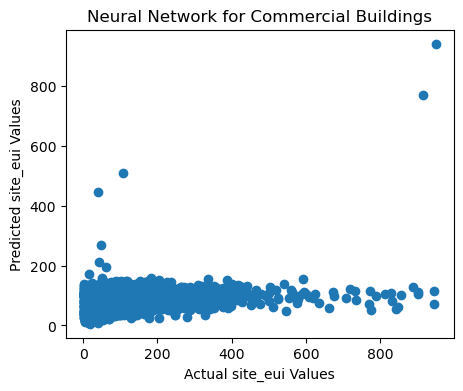

In [102]:
### ANN ON COMMERCIAL BUILDINGS ###
X_train, X_test, y_train, y_test = train_test_split(X_com_train, y_com_train, test_size=0.3)

mlp = MLPRegressor(hidden_layer_sizes = (60,60,60,60), activation = 'relu', max_iter=6000)
mlp = mlp.fit(X_train, np.ravel(y_train))

y_pred = mlp.predict(X_test)
score = mlp.score(X_test, y_test)
print("Score =", score)

plt.figure(figsize=(5,4))
plt.scatter(y_test,y_pred)
plt.title("Neural Network for Commercial Buildings")
plt.xlabel("Actual site_eui Values")
plt.ylabel("Predicted site_eui Values")

Score = 0.16742098912203962


Text(0, 0.5, 'Predicted site_eui Values')

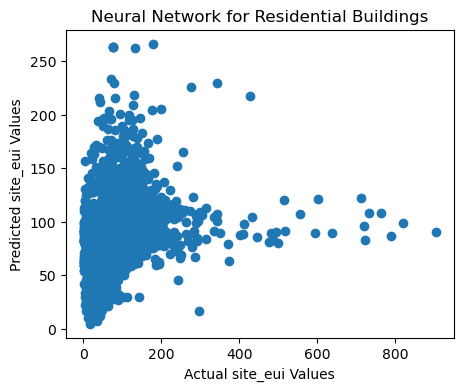

In [93]:
### ANN ON RESIDENTIAL BUILDINGS ###
X_train, X_test, y_train, y_test = train_test_split(X_res_train, y_res_train, test_size=0.3)

mlp = MLPRegressor(hidden_layer_sizes = (60), activation = 'relu', max_iter=6000)
mlp = mlp.fit(X_train, np.ravel(y_train))

y_pred = mlp.predict(X_test)
score = mlp.score(X_test, y_test)
print("Score =", score)

plt.figure(figsize=(5,4))
plt.scatter(y_test,y_pred)
plt.title("Neural Network for Residential Buildings")
plt.xlabel("Actual site_eui Values")
plt.ylabel("Predicted site_eui Values")